In [1]:
# Programmer : Qaidjohar Dama 
# College : Keystone SOE
# Class : TE-A
# Roll No : 13

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Salary_Data.csv')

In [4]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


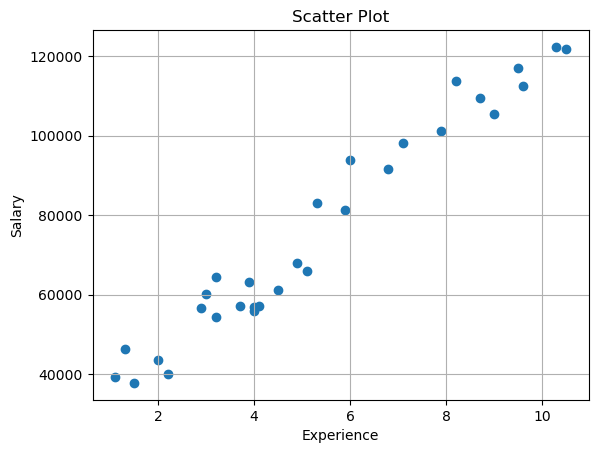

In [6]:
plt.title('Scatter Plot')
plt.scatter(df['YearsExperience'], df['Salary'], marker = 'o')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.grid()

In [7]:
df.shape

(30, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


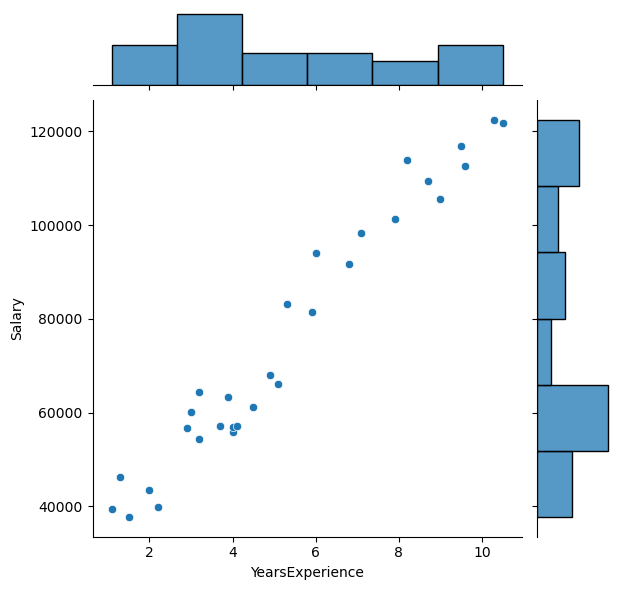

In [9]:
sns.jointplot(x = 'YearsExperience',
              y = 'Salary', data = df)

## Linear Regression

In [15]:
# Seperate input and output data(in 2D)
x = df[['YearsExperience']]

y = df['Salary']

In [11]:
x.ndim

2

In [13]:
# OR Else use Reshape

x = df['YearsExperience']
x = x.values.reshape(30,1)

### Cross Validation

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)

In [18]:
x_train.shape

(22, 1)

In [19]:
y_train.shape

(22,)

In [20]:
x_test.shape

(8, 1)

In [21]:
y_test.shape

(8,)

### Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
LR = LinearRegression()

In [24]:
LR.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred = LR.predict(x_test)

In [26]:
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [27]:
pred = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

In [28]:
pred

,Actual,Predicted
2,37731.0,41056.257055
28,122391.0,123597.709384
13,57081.0,65443.504334
10,63218.0,63567.562235
26,116969.0,116093.940990
24,109431.0,108590.172597
27,112635.0,117031.912039
11,55794.0,64505.533285


In [30]:
# Mean Absolute Error

sum(abs(y_test - y_pred)/len(y_pred))

3508.5455930660555

In [31]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

3508.5455930660555

In [32]:
# Mean Squared Error

sum((y_test - y_pred)**2/len(y_pred))

22407940.143340684

In [34]:
# Actual accuracy/ r2_score

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9779208335417602

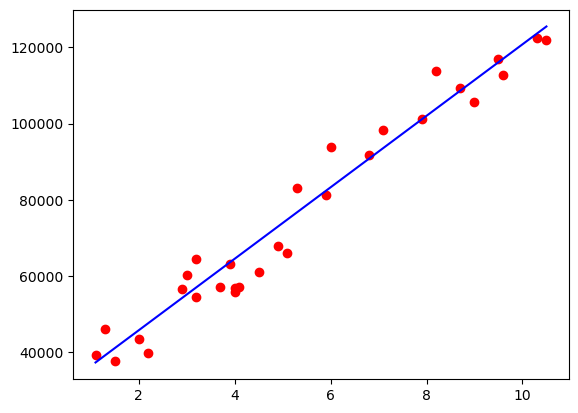

In [36]:
plt.scatter(x, y, color='r')
plt.plot(x, LR.predict(x), color = 'b')